In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import datetime

In [18]:
aug = pd.read_csv('311_8-01_to_8-31function.csv')

In [6]:
aug.tail()

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,open_data_channel_type,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
176010,NaN,NYPD,New York City Police Department,2.028771e+09,BRONX,BRONX,2019-08-31T07:23:09.000,05 BRONX,Noise - Street/Sidewalk,2019-08-30T23:59:24.000,...,PHONE,BRONX,Unspecified,2019-08-31T11:23:14.000,The Police Department responded to the complai...,Closed,WEST TREMONT AVENUE,43678664,1007162.0,249724.0
176011,NaN,NYPD,New York City Police Department,4.088410e+09,QUEENS,WOODHAVEN,2019-08-31T02:55:47.000,09 QUEENS,Noise - Residential,2019-08-30T23:59:29.000,...,PHONE,QUEENS,Unspecified,2019-08-31T06:55:56.000,The Police Department responded to the complai...,Closed,86 AVENUE,43678521,1021651.0,191874.0
176012,NaN,NYPD,New York City Police Department,NaN,BROOKLYN,BROOKLYN,2019-08-31T04:51:15.000,14 BROOKLYN,Noise - Residential,2019-08-30T23:59:35.000,...,PHONE,BROOKLYN,Unspecified,2019-08-31T08:51:34.000,The Police Department responded to the complai...,Closed,AVENUE D,43685124,996710.0,172642.0
176013,NaN,NYPD,New York City Police Department,3.044530e+09,BROOKLYN,BROOKLYN,2019-08-31T02:47:46.000,05 BROOKLYN,Noise - Residential,2019-08-30T23:59:38.000,...,PHONE,BROOKLYN,Unspecified,2019-08-31T06:47:59.000,The Police Department responded to the complai...,Closed,SHEPHERD AVENUE,43682601,1018082.0,182051.0
176014,INTERSECTION,DOT,Department of Transportation,NaN,MANHATTAN,NaN,2019-08-31T00:25:00.000,Unspecified MANHATTAN,Traffic Signal Condition,2019-08-31T00:00:00.000,...,UNKNOWN,MANHATTAN,Unspecified,2019-08-31T00:25:00.000,Service Request status for this request is ava...,Closed,NaN,43678985,NaN,NaN


In [67]:
aug.columns

Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough', 'city',
       'closed_date', 'community_board', 'complaint_type', 'created_date',
       'cross_street_1', 'cross_street_2', 'descriptor', 'facility_type',
       'incident_address', 'incident_zip', 'intersection_street_1',
       'intersection_street_2', 'landmark', 'latitude', 'location',
       'location_address', 'location_city', 'location_state', 'location_type',
       'location_zip', 'longitude', 'open_data_channel_type', 'park_borough',
       'park_facility_name', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name', 'unique_key',
       'x_coordinate_state_plane', 'y_coordinate_state_plane', 'day_of_week'],
      dtype='object')

In [158]:
len(aug.columns)

38

In [155]:
aug.describe()

,bbl,incident_zip,latitude,location_address,location_city,location_state,location_zip,longitude,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
count,1.440190e+05,170546.000000,169019.000000,0.0,0.0,0.0,0.0,169019.000000,1.760150e+05,1.690190e+05,169019.000000
mean,2.841836e+09,10851.261583,40.725742,NaN,NaN,NaN,NaN,-73.923361,4.356163e+07,1.005482e+06,203704.498530
std,1.183381e+09,541.363382,0.083938,NaN,NaN,NaN,NaN,0.083567,7.306620e+04,2.317352e+04,30580.640236
min,0.000000e+00,10000.000000,40.499018,NaN,NaN,NaN,NaN,-74.253920,4.342697e+07,9.136390e+05,121175.000000
25%,2.029010e+09,10451.000000,40.668097,NaN,NaN,NaN,NaN,-73.970172,4.349977e+07,9.925220e+05,182696.000000
50%,3.031830e+09,11207.000000,40.716555,NaN,NaN,NaN,NaN,-73.926928,4.356213e+07,1.004500e+06,200356.000000
75%,4.019100e+09,11237.000000,40.789813,NaN,NaN,NaN,NaN,-73.873553,4.362485e+07,1.019288e+06,227046.000000
max,5.240010e+09,12345.000000,40.912828,NaN,NaN,NaN,NaN,-73.701430,4.492027e+07,1.066980e+06,271861.000000


In [156]:
aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176015 entries, 0 to 176014
Data columns (total 38 columns):
address_type                      66346 non-null object
agency                            176015 non-null object
agency_name                       176015 non-null object
bbl                               144019 non-null float64
borough                           176015 non-null object
city                              158644 non-null object
closed_date                       162242 non-null object
community_board                   176015 non-null object
complaint_type                    176015 non-null object
created_date                      176015 non-null datetime64[ns]
cross_street_1                    141332 non-null object
cross_street_2                    141273 non-null object
descriptor                        172431 non-null object
facility_type                     5835 non-null object
incident_address                  164091 non-null object
incident_zip                

In [19]:
aug['created_date'] = pd.to_datetime(aug['created_date'])
aug["day_of_week"] = aug['created_date'].dt.day_name()
aug['closed_date'] = pd.to_datetime(aug['closed_date'])
aug['days_elapsed'] = (aug['closed_date'] - aug['created_date']).dt.days

In [ ]:
aug['days_elapsed'] = (aug['closed_date'] - aug['created_date']).dt.days

In [20]:
aug['created_date'][9000]

Timestamp('2019-08-02 13:50:00')

In [21]:
aug['closed_date'][9000]

Timestamp('2019-08-26 16:45:00')

In [22]:
a = aug['created_date'][10000]
b = aug['closed_date'][10000]
print(b-a)
print(type(b-a))

2 days 14:58:00
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [10]:
aug['day_of_week'][9000]

'Friday'

In [7]:
aug.day_of_week.value_counts()

Friday       30036
Thursday     29316
Monday       24483
Tuesday      24179
Saturday     23311
Wednesday    22964
Sunday       21726
Name: day_of_week, dtype: int64

### borough by day

In [143]:
aug.loc[aug.borough=='BROOKLYN'].day_of_week.value_counts()
# aug.loc[aug.borough=='BROOKLYN'].day_of_week.count()
# [aug.day_of_week.value_counts()]

Friday       9586
Thursday     9340
Monday       7698
Tuesday      7692
Wednesday    7445
Saturday     7238
Sunday       6711
Name: day_of_week, dtype: int64

In [17]:
bor_days = aug.loc[aug.borough=='BROOKLYN'].day_of_week.value_counts()

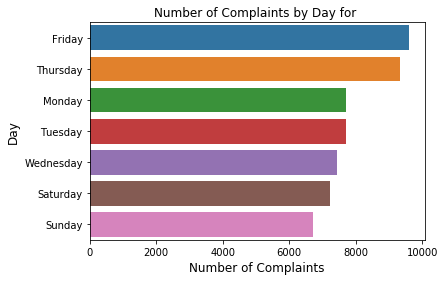

In [20]:
sns.barplot(bor_days.values, bor_days.index)
plt.title('Number of Complaints by Day for ')
plt.ylabel('Day', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

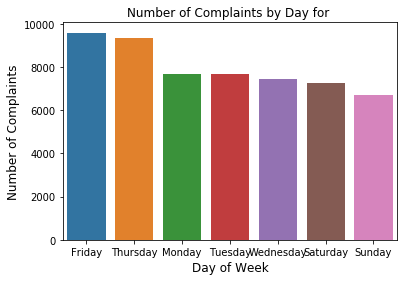

In [22]:
sns.barplot(bor_days.index, bor_days.values)
plt.title('Number of Complaints by Day for ')
plt.ylabel('Number of Complaints', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.show()

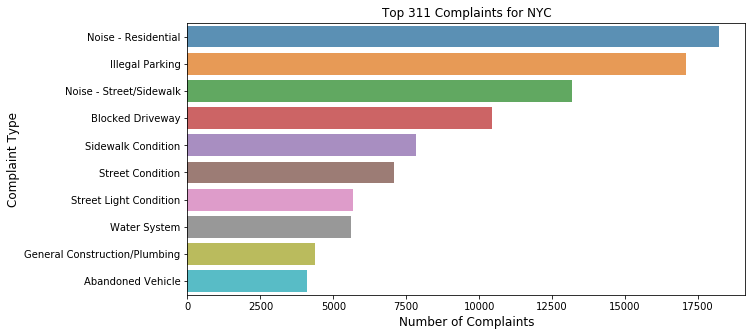

In [34]:
complaint_count  = aug['complaint_type'].value_counts()
complaint_count = complaint_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top 311 Complaints for NYC')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

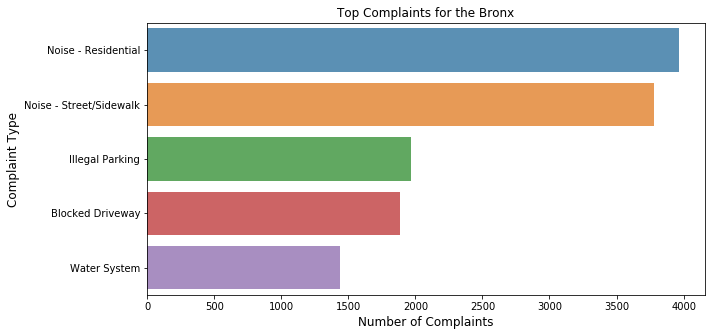

In [9]:
complaint_count  = aug['complaint_type'][aug['borough']=='BRONX'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for the Bronx')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

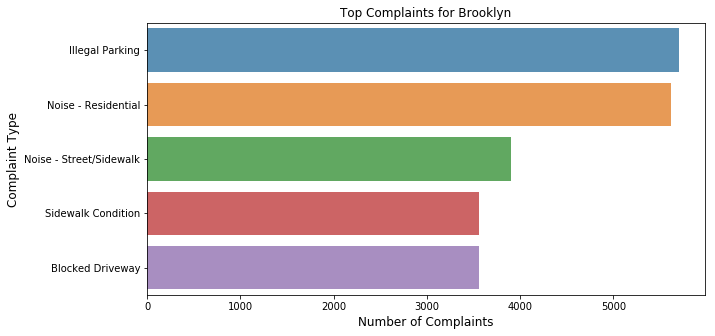

In [25]:
complaint_count  = aug['complaint_type'][aug['borough']=='BROOKLYN'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Brooklyn')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

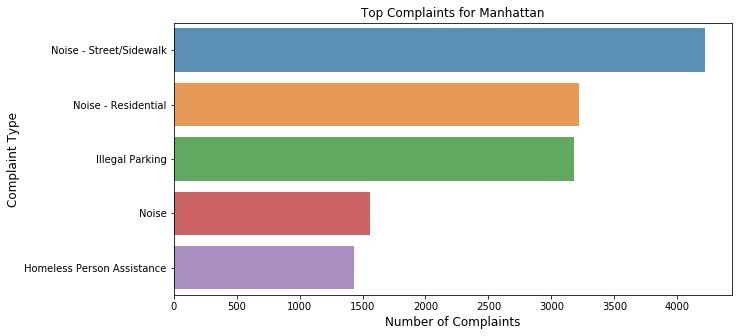

In [26]:
complaint_count  = aug['complaint_type'][aug['borough']=='MANHATTAN'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Manhattan')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

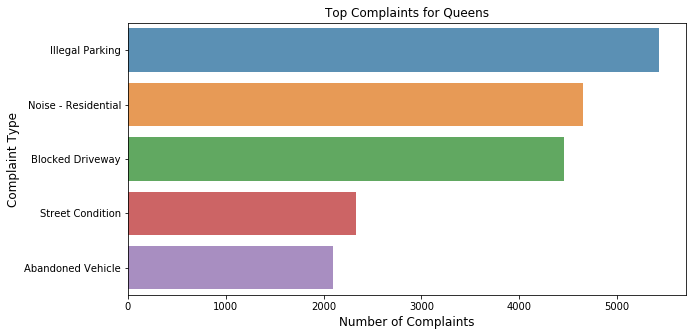

In [27]:
complaint_count  = aug['complaint_type'][aug['borough']=='QUEENS'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Queens')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

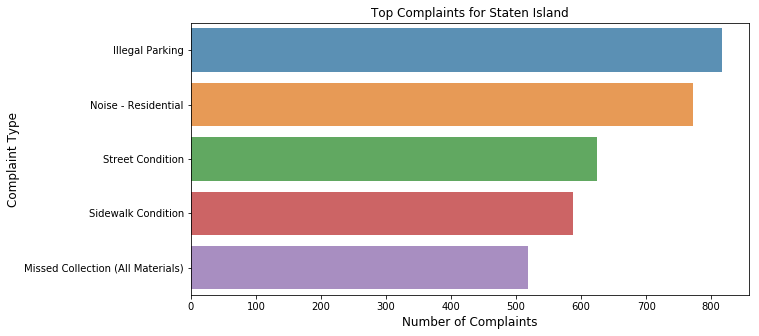

In [28]:
complaint_count  = aug['complaint_type'][aug['borough']=='STATEN ISLAND'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Staten Island')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

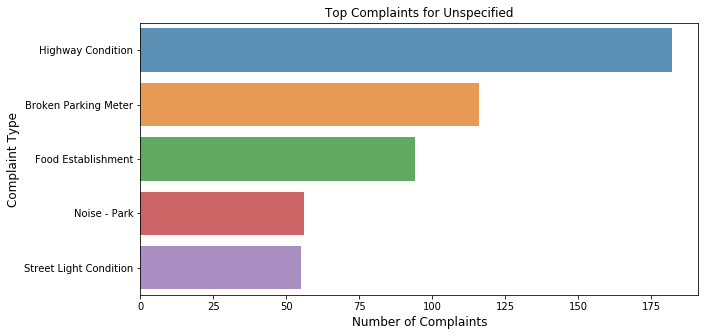

In [29]:
complaint_count  = aug['complaint_type'][aug['borough']=='Unspecified'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Unspecified')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

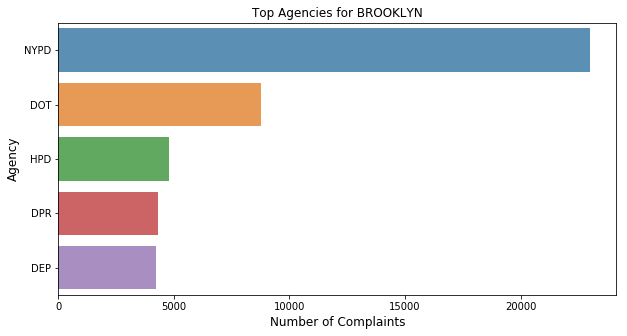

In [35]:
complaint_count  = aug['agency'][aug['borough']=='BROOKLYN'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Agencies for BROOKLYN')
plt.ylabel('Agency', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

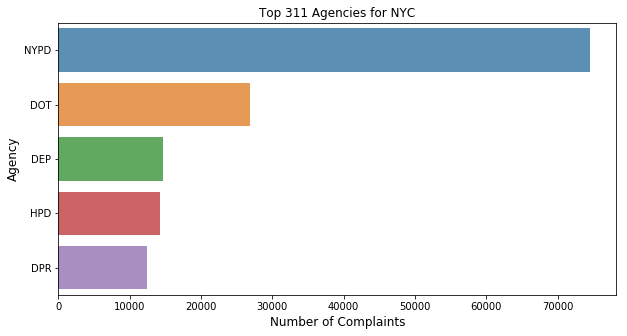

In [36]:

complaint_count  = aug['agency'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top 311 Agencies for NYC')
plt.ylabel('Agency', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

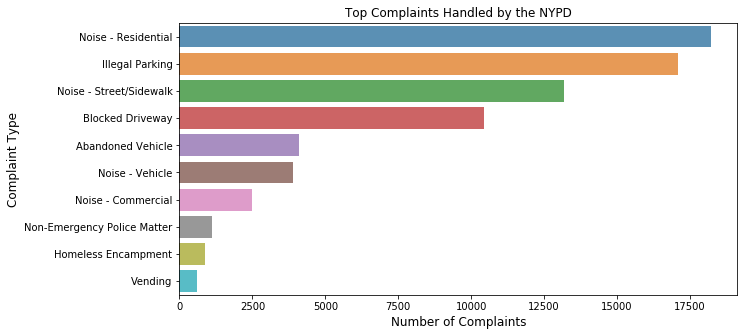

In [37]:
complaint_count  = aug['complaint_type'][aug['agency']=='NYPD'].value_counts()
complaint_count = complaint_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints Handled by the NYPD')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

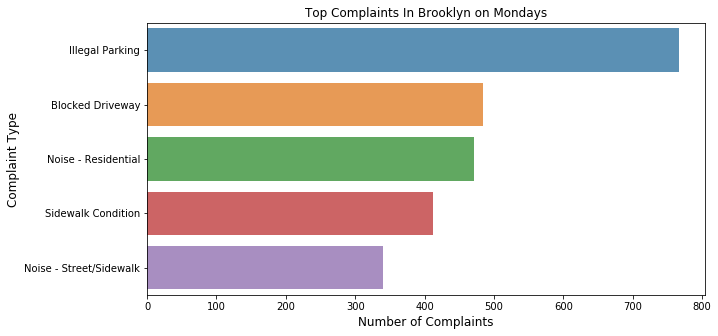

In [49]:
# complaint_count  = aug['complaint_type'][aug['day_of_week']=='Monday'].value_counts()
complaint_count  = aug['complaint_type'][aug['borough']=='BROOKLYN'][aug['day_of_week']=='Monday'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints In Brooklyn on Mondays')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

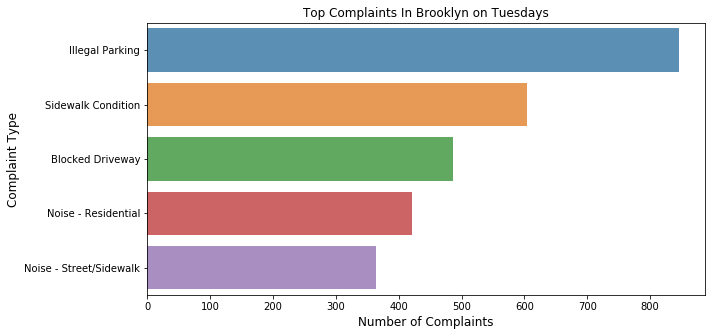

In [50]:
# complaint_count  = aug['complaint_type'][aug['day_of_week']=='Monday'].value_counts()
complaint_count  = aug['complaint_type'][aug['borough']=='BROOKLYN'][aug['day_of_week']=='Tuesday'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints In Brooklyn on Tuesdays')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

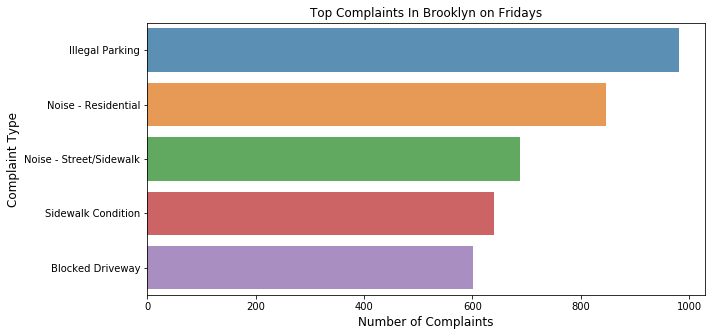

In [51]:
# complaint_count  = aug['complaint_type'][aug['day_of_week']=='Monday'].value_counts()
complaint_count  = aug['complaint_type'][aug['borough']=='BROOKLYN'][aug['day_of_week']=='Friday'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints In Brooklyn on Fridays')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

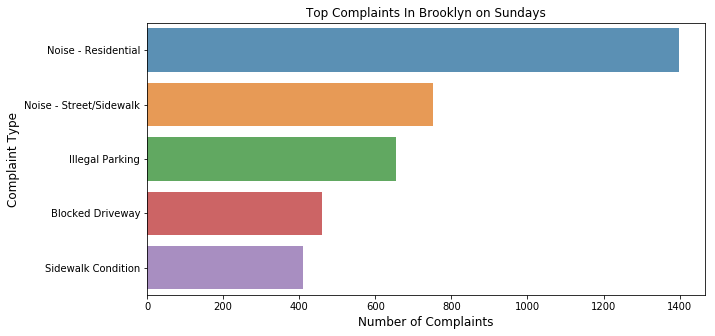

In [52]:
# complaint_count  = aug['complaint_type'][aug['day_of_week']=='Monday'].value_counts()
complaint_count  = aug['complaint_type'][aug['borough']=='BROOKLYN'][aug['day_of_week']=='Sunday'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints In Brooklyn on Sundays')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

In [55]:
aug.open_data_channel_type.value_counts()

PHONE      63071
ONLINE     41663
UNKNOWN    39903
MOBILE     31373
OTHER          5
Name: open_data_channel_type, dtype: int64

In [61]:
print(aug.groupby(['borough', 'open_data_channel_type']).borough.count().unstack())

open_data_channel_type   MOBILE   ONLINE  OTHER    PHONE  UNKNOWN
borough                                                          
BRONX                    4762.0   7685.0    2.0  11650.0   5859.0
BROOKLYN                11431.0  13057.0    1.0  19251.0  11970.0
MANHATTAN                6699.0   9879.0    1.0  10028.0   8083.0
QUEENS                   7421.0   8954.0    1.0  18267.0  10836.0
STATEN ISLAND            1060.0   1763.0    NaN   3526.0   2864.0
Unspecified                 NaN    325.0    NaN    349.0    291.0


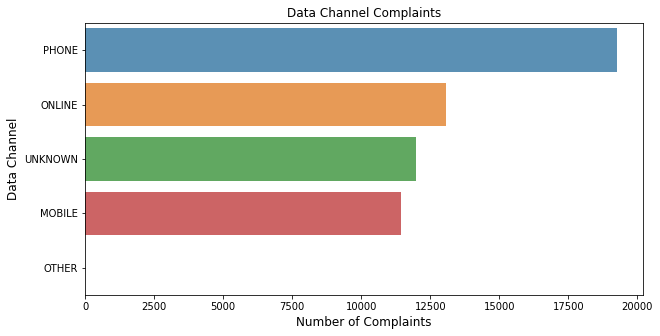

In [117]:
# complaint_count  = aug['complaint_type'][aug['day_of_week']=='Monday'].value_counts()
complaint_count  = aug['open_data_channel_type'][aug['borough']=='BROOKLYN'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Data Channel Complaints')
plt.ylabel('Data Channel', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

In [65]:
print(aug.groupby(['borough','day_of_week']).borough.count().unstack())
pclass = aug.groupby(['borough','day_of_week']).borough.count().unstack()


day_of_week    Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
borough                                                                      
BRONX            4917    4163      4317    4066      4821     3969       3705
BROOKLYN         9586    7698      7238    6711      9340     7692       7445
MANHATTAN        6011    4820      4746    4281      5751     4671       4410
QUEENS           7806    6381      5789    5630      7552     6427       5894
STATEN ISLAND    1572    1292      1132     941      1671     1261       1344
Unspecified       144     129        89      97       181      159        166


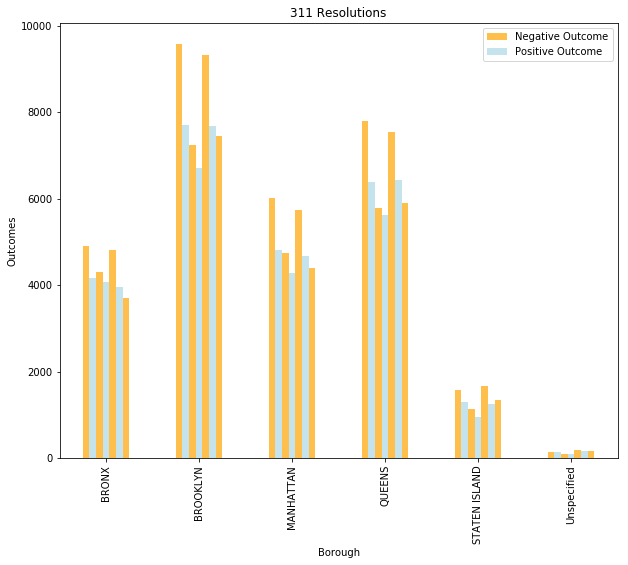

In [66]:
p1 = pclass.plot(kind = 'bar', stacked = False, 
                   title = '311 Resolutions', 
                   color = ['orange','lightblue'], alpha = .70,figsize = (10,8))
p1.set_xlabel('Borough')
p1.set_ylabel('Outcomes')
p1.legend(['Negative Outcome','Positive Outcome'])
plt.show()

In [188]:
print(aug.groupby(['day_of_week', 'borough'], sort=False).day_of_week.count().unstack())
pclass = aug.groupby(['day_of_week', 'borough'], sort=False).day_of_week.count().unstack()


borough      STATEN ISLAND  QUEENS  MANHATTAN  BROOKLYN  BRONX  Unspecified
day_of_week                                                                
Thursday              1671    7552       5751      9340   4821          181
Friday                1572    7806       6011      9586   4917          144
Saturday              1132    5789       4746      7238   4317           89
Sunday                 941    5630       4281      6711   4066           97
Monday                1292    6381       4820      7698   4163          129
Tuesday               1261    6427       4671      7692   3969          159
Wednesday             1344    5894       4410      7445   3705          166


In [ ]:
friday, brooklyn, queens, manhattan, bronx, staten island, unspecified

4, 1, 3, 2, 5, 6
bronx, brooklyn, manhattan, queens, staten island, unspecified

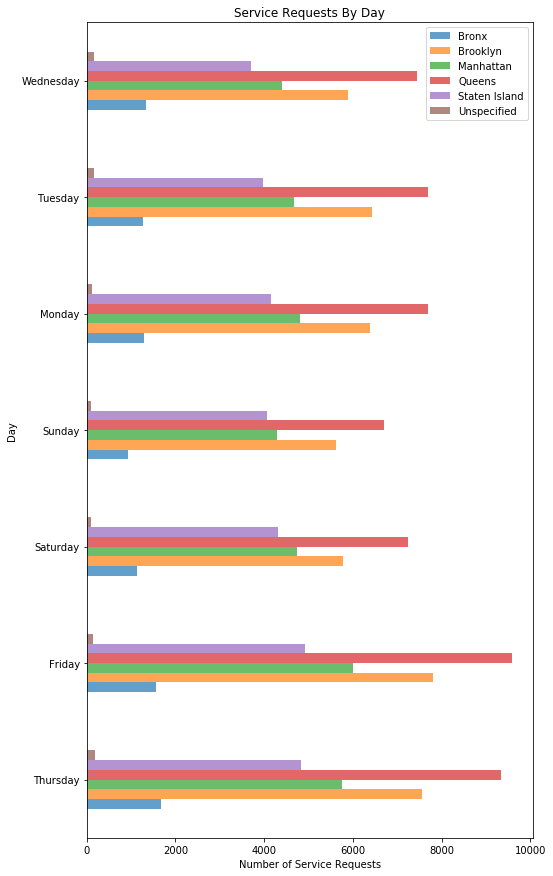

In [189]:
p1 = pclass.plot(kind = 'barh', stacked = False, 
                    title = 'Service Requests By Day', 
#                    color = ['orange','darkblue', 'yellow', 'green', 'red', 'pink'], 
#                     colorscale = 
                    alpha = .70,figsize = (8,15))
p1.set_xlabel('Number of Service Requests')
p1.set_ylabel('Day')
p1.legend(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Unspecified'])
plt.show()

In [10]:
top5  = aug['complaint_type'][aug['borough']=='BROOKLYN'].value_counts()
top5 = top5[:5,]

In [13]:
len(aug['complaint_type'][aug['borough']=='BROOKLYN'].value_counts())

138

In [11]:
top5

Illegal Parking            5697
Noise - Residential        5618
Noise - Street/Sidewalk    3897
Sidewalk Condition         3557
Blocked Driveway           3553
Name: complaint_type, dtype: int64

In [15]:
top5.values

array([5697, 5618, 3897, 3557, 3553])

In [16]:
top5.index

Index(['Illegal Parking', 'Noise - Residential', 'Noise - Street/Sidewalk',
       'Sidewalk Condition', 'Blocked Driveway'],
      dtype='object')

# Function for Borough

In [8]:
def borough_info(THIS):

    #barplot for top 5 complaints
    top5  = aug['complaint_type'][aug['borough']==THIS].value_counts()
    top5 = top5[:5,]
    plt.figure(figsize=(10,5))
    sns.barplot(top5.values, top5.index, alpha=0.8)
    plt.title('Top Complaints in {}'.format(THIS))
    plt.ylabel('Complaint Type', fontsize=12)
    plt.xlabel('Number of Complaints', fontsize=12)
    plt.show()

    #barplot top 5 agencies
    top_agencies  = aug['agency'][aug['borough']==THIS].value_counts()
    top_agencies = top_agencies[:5,]
    plt.figure(figsize=(10,5))
    sns.barplot(top_agencies.values, top_agencies.index, alpha=0.8)
    plt.title('Top Agencies in {}'.format(THIS))
    plt.ylabel('Agency', fontsize=12)
    plt.xlabel('Number of Complaints', fontsize=12)
    plt.show()
    
        #data channel
    # complaint_count  = aug['complaint_type'][aug['day_of_week']=='Monday'].value_counts()
    data_channel  = aug['open_data_channel_type'][aug['borough']==THIS].value_counts()
    data_channel = data_channel[:5,]
    plt.figure(figsize=(10,5))
    sns.barplot(data_channel.values, data_channel.index, alpha=0.8)
    plt.title('Data Channel Complaints in {}'.format(THIS))
    plt.ylabel('Data Channel', fontsize=12)
    plt.xlabel('Number of Complaints', fontsize=12)
    plt.show()
    
    #per day
    bor_days = aug.loc[aug.borough==THIS].day_of_week.value_counts()
    sns.barplot(bor_days.values, bor_days.index)
    plt.title('Number of Complaints by Day for {}'.format(THIS))
    plt.ylabel('Day', fontsize=12)
    plt.xlabel('Number of Complaints', fontsize=12)
    plt.show()

    #day of week
    Days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    for day in Days:
        complaint_count  = aug['complaint_type'][aug['borough']==THIS][aug['day_of_week']==day].value_counts()
        complaint_count = complaint_count[:5,]
        plt.figure(figsize=(10,5))
        sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
        plt.title('Top Complaints in {} on {}'.format(THIS, day))
#         plt.title('f model: T=%str' %day)
        plt.ylabel('Complaint Type', fontsize=12)
        plt.xlabel('Number of Complaints', fontsize=12)
        plt.show()


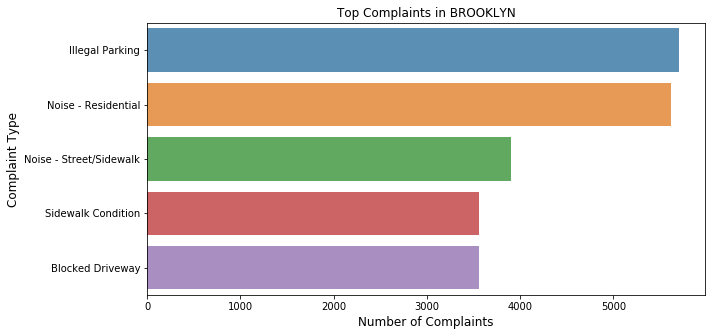

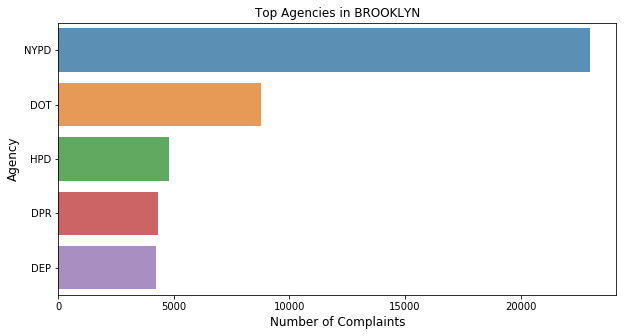

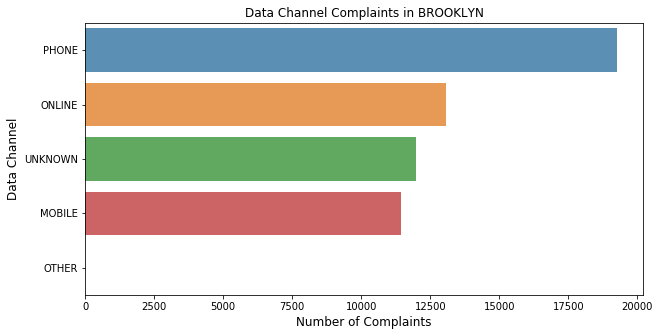

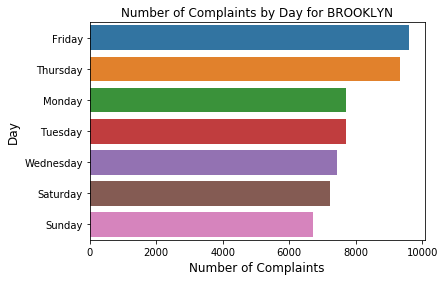

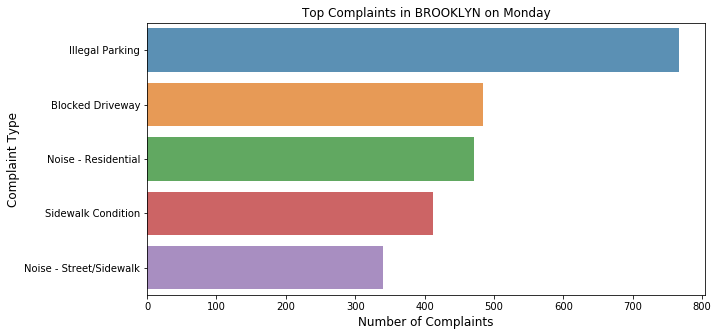

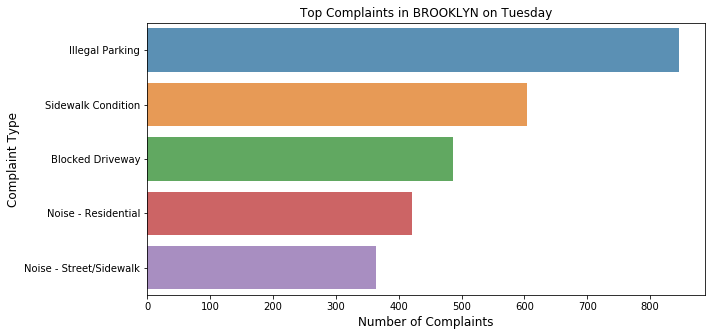

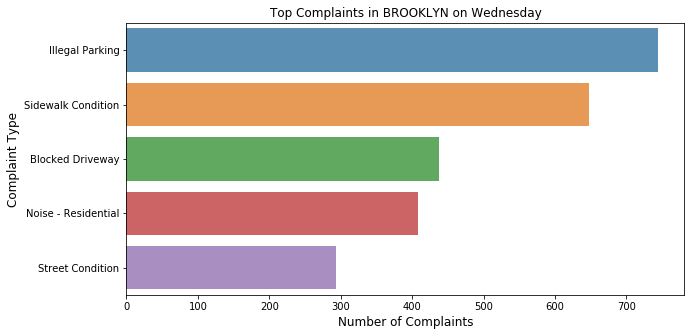

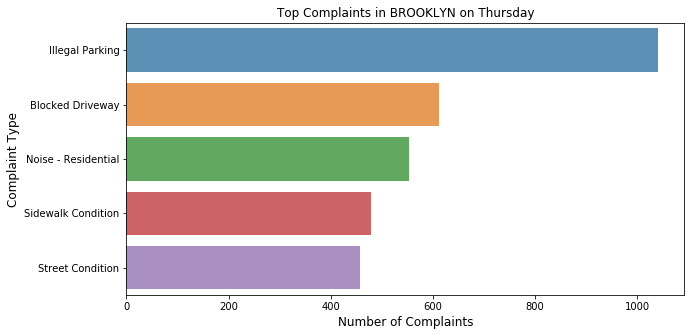

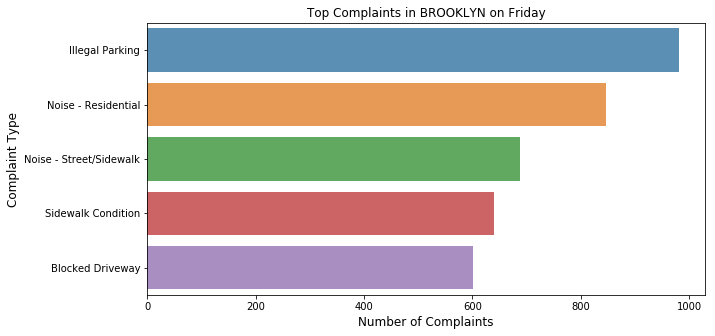

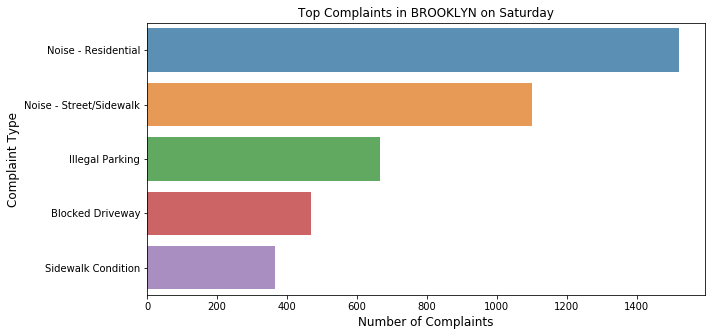

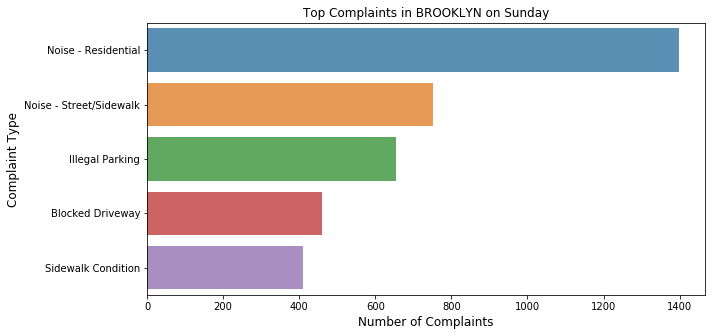

In [193]:
borough_info('BROOKLYN')

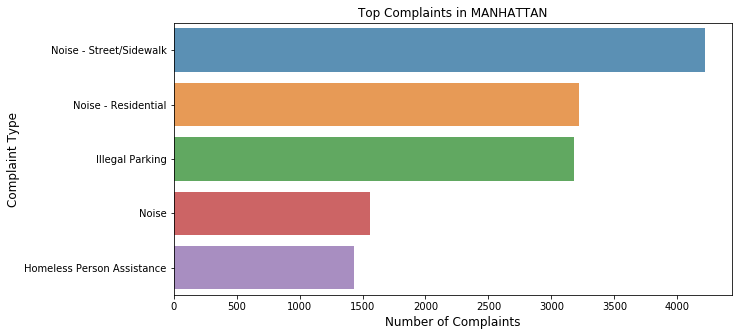

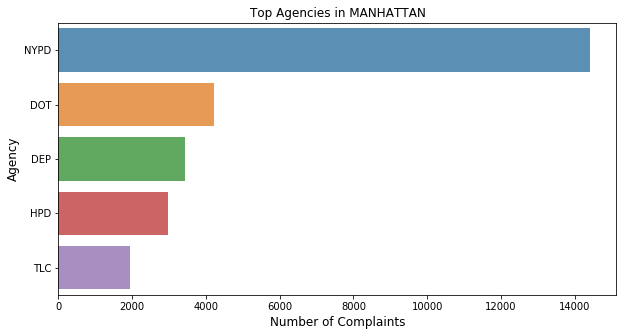

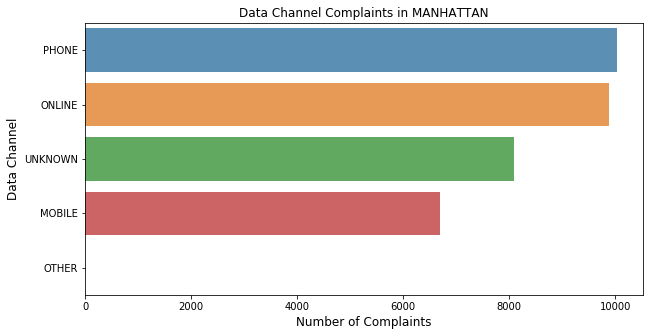

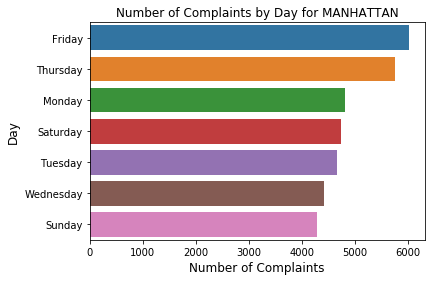

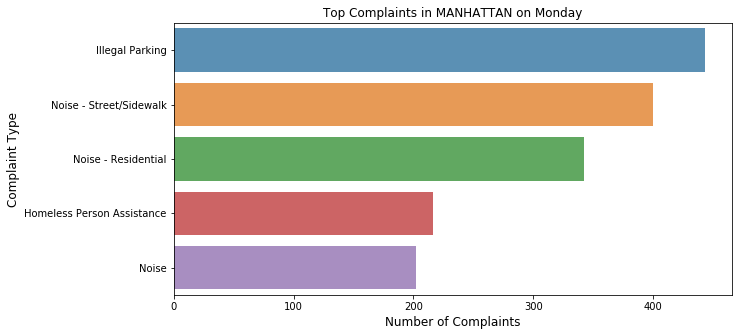

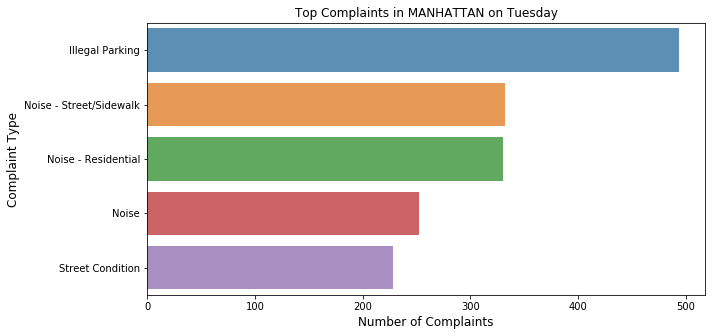

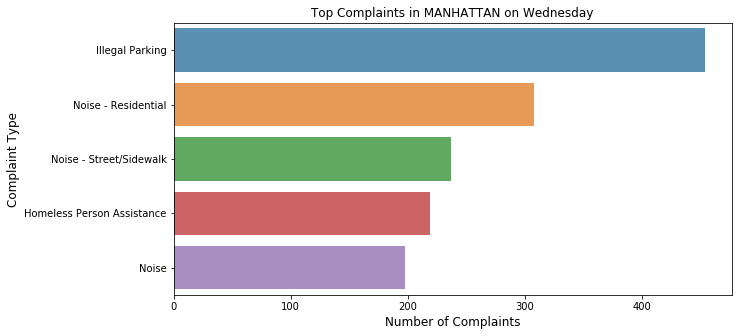

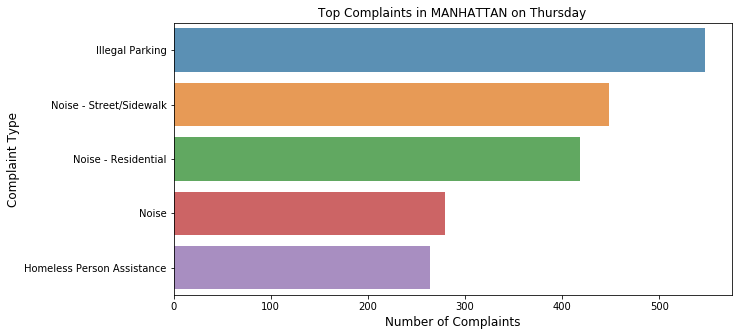

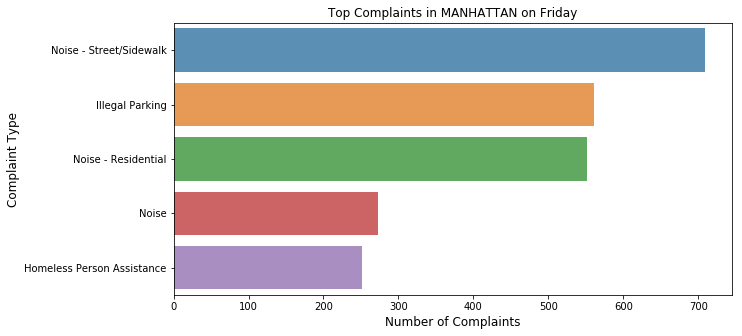

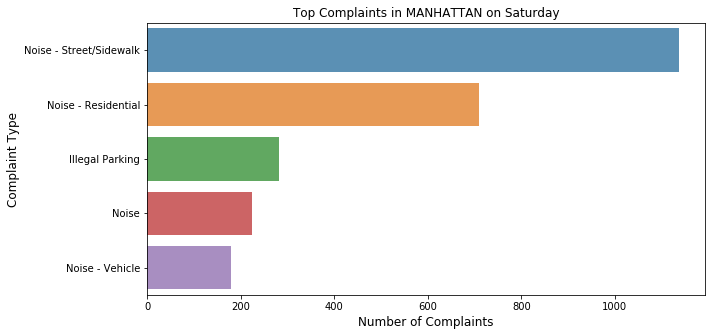

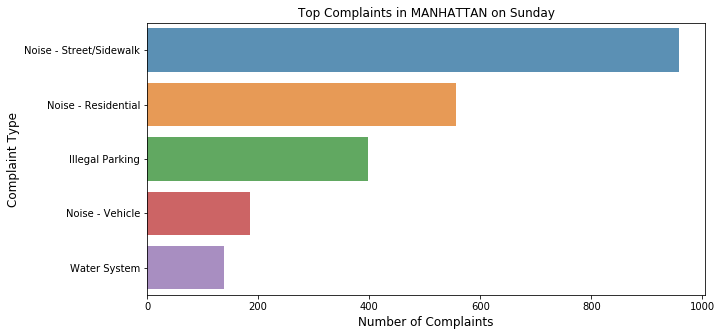

In [194]:
borough_info('MANHATTAN')

### Folium

In [42]:
import folium

In [79]:
div = aug1[['agency', 'borough', 'complaint_type', 'latitude', 'longitude']]
div.dropna(inplace=True)

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
div.head()

,agency,borough,complaint_type,latitude,longitude
0,DEP,STATEN ISLAND,Industrial Waste,40.558623,-74.127917
1,NYPD,QUEENS,Noise - Commercial,40.698231,-73.786514
2,NYPD,MANHATTAN,Noise - Residential,40.791258,-73.946002
3,NYPD,BROOKLYN,Noise - Residential,40.688206,-73.946266
4,NYPD,QUEENS,Blocked Driveway,40.709169,-73.781891


In [80]:
#aug 169k rows, aug1 11.5k

div.shape

(11528, 5)

In [100]:
m = folium.Map([40.7128, -73.90060], zoom_start=11)

In [82]:
for index, row in div.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                       radius=5,
                       popup=row['complaint_type'],
                       fill_color="#3db7e4").add_to(m)

In [86]:
m

In [102]:
statArr = div[['latitude', 'longitude']].as_matrix()
m.add_child(plugins.HeatMap(statArr, radius=5))

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [64]:
aug1.shape

(12064, 37)

In [104]:
nypd = aug1.loc[aug1['agency'] == 'NYPD']
div = nypd[['agency', 'borough', 'complaint_type', 'latitude', 'longitude']]
div.dropna(inplace=True)
m = folium.Map([40.7128, -73.90060], zoom_start=11)
for index, row in div.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                       radius=5,
                       popup=row['complaint_type'],
                       fill_color="#3db7e4").add_to(m)

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
m

### Function for maps

In [ ]:
def maps(feature, specific):
    map1 = aug1.loc[aug1[feature] == specific]
    div = map1[['agency', 'borough', 'complaint_type', 'latitude', 'longitude']]
    div.dropna(inplace=True)
    m = folium.Map([40.7128, -73.90060], zoom_start=11)
    for index, row in div.iterrows():
        folium.CircleMarker([row['latitude'], row['longitude']],
                           radius=5,
                           popup=row['complaint_type'],
                           fill_color="#3db7e4").add_to(m)

### Choropleth

In [77]:
three_geo = 'map.geojson'

folium.Choropleth(
    geo_data=three_geo,
    name='choropleth',
    data=aug1,
    columns=['borough', 'complaint_type'],
    key_on='feature.properties.borough',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,)
    legend_name="311 Service Requests").add_to(m)

folium.LayerControl().add_to(m)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

NameError: name 'aug' is not defined

### Days Elapsed creation and closed

In [ ]:
for index, row in aug.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                       radius=5,
                       popup=row['complaint_type'],
                       fill_color="#3db7e4").add_to(m)

In [14]:
for index, row in aug.iterrows():
    aug['days_elapsed'] = row['closed_date'] - row['created_date']
    

In [15]:
aug.head()

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,day_of_week,days_elapsed
0,ADDRESS,DEP,Department of Environmental Protection,5.047110e+09,STATEN ISLAND,STATEN ISLAND,2019-08-01 00:00:00,03 STATEN ISLAND,Industrial Waste,2019-08-01 00:00:00,...,Unspecified,2019-08-01T00:00:00.000,The Department of Environmental Protection inv...,Closed,CHESTERTON AVENUE,43445244,948706.0,142824.0,Thursday,00:25:00
1,NaN,NYPD,New York City Police Department,4.102530e+09,QUEENS,JAMAICA,2019-08-01 01:03:52,12 QUEENS,Noise - Commercial,2019-08-01 00:00:56,...,Unspecified,2019-08-01T05:03:57.000,The Police Department responded to the complai...,Closed,MERRICK BOULEVARD,43431340,1043447.0,193733.0,Thursday,00:25:00
2,NaN,NYPD,New York City Police Department,1.016330e+09,MANHATTAN,NEW YORK,2019-08-01 00:57:35,11 MANHATTAN,Noise - Residential,2019-08-01 00:01:12,...,Unspecified,2019-08-01T04:57:38.000,The Police Department responded to the complai...,Closed,EAST 105 STREET,43432351,999202.0,227558.0,Thursday,00:25:00
3,NaN,NYPD,New York City Police Department,3.018040e+09,BROOKLYN,BROOKLYN,2019-08-01 01:19:31,03 BROOKLYN,Noise - Residential,2019-08-01 00:01:29,...,Unspecified,2019-08-01T05:19:33.000,The Police Department responded to the complai...,Closed,LEXINGTON AVENUE,43433332,999152.0,190013.0,Thursday,00:25:00
4,NaN,NYPD,New York City Police Department,4.098950e+09,QUEENS,JAMAICA,2019-08-01 02:13:40,12 QUEENS,Blocked Driveway,2019-08-01 00:01:36,...,Unspecified,2019-08-01T06:13:48.000,The Police Department responded to the complai...,Closed,179 PLACE,43429747,1044719.0,197721.0,Thursday,00:25:00


In [39]:
aug['days_elapse'] = (aug['closed_date'] - aug['created_date']).dt.days

In [42]:
aug.tail(25)

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,day_of_week,days_elapse
175990,NaN,NYPD,New York City Police Department,3.087910e+09,BROOKLYN,BROOKLYN,2019-08-31 06:04:37,15 BROOKLYN,Illegal Parking,2019-08-30 23:57:01,...,Unspecified,2019-08-31T10:04:40.000,The Police Department responded to the complai...,Closed,VOORHIES AVENUE,43681507,1000889.0,153223.0,Friday,0.0
175991,NaN,NYPD,New York City Police Department,3.052300e+09,BROOKLYN,BROOKLYN,2019-08-31 06:23:10,14 BROOKLYN,Blocked Driveway,2019-08-30 23:57:09,...,Unspecified,2019-08-31T10:23:13.000,The Police Department issued a summons in resp...,Closed,EAST 28 STREET,43683433,998097.0,171717.0,Friday,0.0
175992,NaN,DCA,Department of Consumer Affairs,4.001430e+09,QUEENS,LONG ISLAND CITY,NaT,01 QUEENS,Consumer Complaint,2019-08-30 23:57:24,...,Unspecified,2019-09-04T14:37:33.000,The Department of Consumer Affairs has already...,In Progress,NORTHERN BOULEVARD,43679616,1006502.0,213793.0,Friday,NaN
175993,NaN,TLC,Taxi and Limousine Commission,1.004068e+09,MANHATTAN,NEW YORK,2019-08-31 09:54:13,03 MANHATTAN,Lost Property,2019-08-30 23:57:27,...,Unspecified,2019-08-31T13:54:19.000,See notes for information.,Closed,AVENUE B,43683684,990167.0,204727.0,Friday,0.0
175994,NaN,NYPD,New York City Police Department,2.045700e+09,BRONX,BRONX,2019-08-31 03:15:45,12 BRONX,Noise - Street/Sidewalk,2019-08-30 23:57:37,...,Unspecified,2019-08-31T07:15:46.000,The Police Department responded to the complai...,Closed,HOLLAND AVENUE,43679611,1021521.0,256314.0,Friday,0.0
175995,NaN,NYPD,New York City Police Department,4.140100e+09,QUEENS,HOWARD BEACH,2019-08-31 03:16:16,10 QUEENS,Noise - Residential,2019-08-30 23:57:39,...,Unspecified,2019-08-31T07:16:31.000,The Police Department responded to the complai...,Closed,90 STREET,43681858,1027920.0,179153.0,Friday,0.0
175996,NaN,NYPD,New York City Police Department,1.022190e+09,MANHATTAN,NEW YORK,2019-08-31 03:53:20,12 MANHATTAN,Noise - Street/Sidewalk,2019-08-30 23:57:49,...,Unspecified,2019-08-31T07:53:31.000,The Police Department responded and upon arriv...,Closed,POST AVENUE,43684942,1006266.0,254217.0,Friday,0.0
175997,NaN,NYPD,New York City Police Department,1.016100e+09,MANHATTAN,NEW YORK,2019-08-31 01:45:17,11 MANHATTAN,Noise - Street/Sidewalk,2019-08-30 23:57:49,...,Unspecified,2019-08-31T05:45:34.000,The Police Department responded to the complai...,Closed,MADISON AVENUE,43685324,998033.0,228050.0,Friday,0.0
175998,NaN,NYPD,New York City Police Department,2.030580e+09,BRONX,BRONX,2019-08-31 19:52:22,06 BRONX,Noise - Residential,2019-08-30 23:58:06,...,Unspecified,2019-08-31T23:52:25.000,The Police Department reviewed your complaint ...,Closed,LORILLARD PLACE,43685995,1015165.0,251712.0,Friday,0.0
175999,NaN,NYPD,New York City Police Department,4.015540e+09,QUEENS,ELMHURST,2019-08-31 04:41:31,04 QUEENS,Noise - Residential,2019-08-30 23:58:10,...,Unspecified,2019-08-31T08:41:35.000,The Police Department responded to the complai...,Closed,ELBERTSON STREET,43684914,1018432.0,211316.0,Friday,0.0


In [51]:
aug.complaint_type.value_counts()

Noise - Residential                  18218
Illegal Parking                      17095
Noise - Street/Sidewalk              13198
Blocked Driveway                     10438
Sidewalk Condition                    7833
Street Condition                      7072
Street Light Condition                5688
Water System                          5620
General Construction/Plumbing         4384
Abandoned Vehicle                     4105
UNSANITARY CONDITION                  3889
Noise - Vehicle                       3878
Noise                                 3686
Missed Collection (All Materials)     3403
Rodent                                3336
Damaged Tree                          3328
Derelict Vehicles                     3192
Traffic Signal Condition              3075
Sewer                                 2969
Dirty Conditions                      2908
Noise - Commercial                    2473
Homeless Person Assistance            2313
Overgrown Tree/Branches               2095
Building/Us

In [49]:
len(aug.agency.value_counts())

14

In [50]:
aug.agency.value_counts()

NYPD     74525
DOT      26841
DEP      14649
HPD      14310
DPR      12436
DSNY     10117
DOB       9692
DOHMH     6176
TLC       3182
DHS       2313
DCA       1400
EDC        244
DOE         94
DOITT       36
Name: agency, dtype: int64

In [45]:
aug.days_elapse.value_counts()

 0.0      98698
 1.0       9212
 2.0       6954
 3.0       4967
 4.0       3081
 5.0       2713
 6.0       2442
 7.0       1989
 8.0       1521
 14.0      1297
 9.0       1261
 13.0      1259
 10.0      1128
 12.0      1096
 15.0      1078
 17.0      1066
 18.0       998
 11.0       997
 16.0       987
 19.0       934
 20.0       897
 21.0       805
 22.0       793
 26.0       697
 28.0       668
 23.0       655
 27.0       620
-3.0        605
 24.0       590
 25.0       550
          ...  
 88.0        44
 96.0        43
 100.0       42
 109.0       41
 101.0       40
 94.0        39
 97.0        38
 92.0        37
 103.0       34
 89.0        33
 105.0       31
 102.0       29
 104.0       28
 107.0       26
 99.0        26
 108.0       23
 106.0       20
-10.0        16
-5.0         15
-6.0         14
-11.0        14
-7.0         13
 110.0       12
-1.0          9
-12.0         9
-13.0         8
 112.0        5
 111.0        4
 113.0        2
-8.0          1
Name: days_elapse, Lengt

In [52]:
aug.head()

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,day_of_week,days_elapse
0,ADDRESS,DEP,Department of Environmental Protection,5.047110e+09,STATEN ISLAND,STATEN ISLAND,2019-08-01 00:00:00,03 STATEN ISLAND,Industrial Waste,2019-08-01 00:00:00,...,Unspecified,2019-08-01T00:00:00.000,The Department of Environmental Protection inv...,Closed,CHESTERTON AVENUE,43445244,948706.0,142824.0,Thursday,0.0
1,NaN,NYPD,New York City Police Department,4.102530e+09,QUEENS,JAMAICA,2019-08-01 01:03:52,12 QUEENS,Noise - Commercial,2019-08-01 00:00:56,...,Unspecified,2019-08-01T05:03:57.000,The Police Department responded to the complai...,Closed,MERRICK BOULEVARD,43431340,1043447.0,193733.0,Thursday,0.0
2,NaN,NYPD,New York City Police Department,1.016330e+09,MANHATTAN,NEW YORK,2019-08-01 00:57:35,11 MANHATTAN,Noise - Residential,2019-08-01 00:01:12,...,Unspecified,2019-08-01T04:57:38.000,The Police Department responded to the complai...,Closed,EAST 105 STREET,43432351,999202.0,227558.0,Thursday,0.0
3,NaN,NYPD,New York City Police Department,3.018040e+09,BROOKLYN,BROOKLYN,2019-08-01 01:19:31,03 BROOKLYN,Noise - Residential,2019-08-01 00:01:29,...,Unspecified,2019-08-01T05:19:33.000,The Police Department responded to the complai...,Closed,LEXINGTON AVENUE,43433332,999152.0,190013.0,Thursday,0.0
4,NaN,NYPD,New York City Police Department,4.098950e+09,QUEENS,JAMAICA,2019-08-01 02:13:40,12 QUEENS,Blocked Driveway,2019-08-01 00:01:36,...,Unspecified,2019-08-01T06:13:48.000,The Police Department responded to the complai...,Closed,179 PLACE,43429747,1044719.0,197721.0,Thursday,0.0


In [53]:
print(aug.groupby(['borough', 'days_elapse']).borough.count().unstack())

days_elapse    -13.0   -12.0   -11.0   -10.0   -8.0    -7.0    -6.0    -5.0    \
borough                                                                         
BRONX             NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
BROOKLYN          NaN     8.0    12.0     3.0     1.0     9.0     NaN     4.0   
MANHATTAN         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
QUEENS            8.0     1.0     2.0    13.0     NaN     4.0    14.0    11.0   
STATEN ISLAND     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Unspecified       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

days_elapse    -4.0    -3.0     ...     104.0   105.0   106.0   107.0   108.0  \
borough                         ...                                             
BRONX             2.0   186.0   ...       1.0     NaN     NaN     NaN     1.0   
BROOKLYN         51.0   145.0   ...       6.0     7.0     7.0     3.0     3.0   
MANHATTAN         3.0   126

In [58]:
aug['avg_time'] = ['1' if x <= 1 else '2' for x in aug['days_elapse']]

SyntaxError: invalid syntax (<ipython-input-58-bde5522ee992>, line 1)

In [75]:
for x in aug['days_elapse']:
    if x >=60:
        aug['avg_time'] = 60
    elif 14 < x <=30:
        aug['avg_time'] = 30
    elif 7 < x <=14:
        aug['avg_time'] = 14
    elif 2 < x <=7:
        aug['avg_time'] = 7
    elif 1 < x <=2:
        aug['avg_time'] = 2
    elif x <= 1:
        aug['avg_time'] = 1
        
        
        
        
        
#     elif x <=30:
#         aug['avg_time'] = 30
#     elif x <=14:
#         aug['avg_time'] = 14
#     elif x <=7:
#         aug['avg_time'] = 7
#     elif x <=2:
#         aug['avg_time'] = 2
#     elif x <=1:
#         aug['avg_time'] = 1

In [77]:
aug.tail(15)

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,...,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,day_of_week,days_elapse,avg_time
176000,NaN,NYPD,New York City Police Department,4.015540e+09,QUEENS,ELMHURST,2019-08-31 04:41:31,04 QUEENS,Noise - Residential,2019-08-30 23:58:10,...,2019-08-31T08:41:35.000,The Police Department responded to the complai...,Closed,ELBERTSON STREET,43684914,1018432.0,211316.0,Friday,0.0,1
176001,NaN,NYPD,New York City Police Department,3.016650e+09,BROOKLYN,BROOKLYN,2019-08-31 06:36:08,03 BROOKLYN,Noise - Residential,2019-08-30 23:58:19,...,2019-08-31T10:36:14.000,The Police Department responded and upon arriv...,Closed,MACON STREET,43681547,1002827.0,188119.0,Friday,0.0,1
176002,NaN,NYPD,New York City Police Department,4.111320e+09,QUEENS,QUEENS VILLAGE,2019-09-01 02:52:00,13 QUEENS,Noise - Residential,2019-08-30 23:58:31,...,2019-09-01T06:52:06.000,The Police Department responded to the complai...,Closed,212 STREET,43678609,1055324.0,195814.0,Friday,1.0,1
176003,NaN,NYPD,New York City Police Department,4.035460e+09,QUEENS,RIDGEWOOD,2019-08-31 03:36:42,05 QUEENS,Noise - Street/Sidewalk,2019-08-30 23:58:48,...,2019-08-31T07:36:48.000,The Police Department responded to the complai...,Closed,CORNELIA STREET,43686144,1010154.0,194048.0,Friday,0.0,1
176004,NaN,NYPD,New York City Police Department,4.111040e+09,QUEENS,QUEENS VILLAGE,2019-09-01 02:54:04,13 QUEENS,Noise - Residential,2019-08-30 23:58:57,...,2019-09-01T06:54:10.000,The Police Department responded to the complai...,Closed,217 PLACE,43685146,1056355.0,199137.0,Friday,1.0,1
176005,INTERSECTION,DEP,Department of Environmental Protection,NaN,QUEENS,Sunnyside,2019-09-04 01:45:00,02 QUEENS,Noise,2019-08-30 23:59:00,...,2019-09-04T01:45:00.000,The Department of Environmental Protection did...,Closed,NaN,43684618,1006521.0,210078.0,Friday,4.0,1
176006,NaN,NYPD,New York City Police Department,3.012730e+09,BROOKLYN,BROOKLYN,2019-08-31 02:02:15,09 BROOKLYN,Noise - Residential,2019-08-30 23:59:01,...,2019-08-31T06:02:18.000,The Police Department responded to the complai...,Closed,UNION STREET,43681735,996055.0,183232.0,Friday,0.0,1
176007,NaN,NYPD,New York City Police Department,1.016100e+09,MANHATTAN,NEW YORK,2019-08-31 01:08:43,11 MANHATTAN,Noise - Street/Sidewalk,2019-08-30 23:59:01,...,2019-08-31T05:08:49.000,The Police Department responded to the complai...,Closed,PARK AVENUE,43685322,998477.0,227812.0,Friday,0.0,1
176008,NaN,NYPD,New York City Police Department,3.049500e+09,BROOKLYN,BROOKLYN,2019-08-31 02:04:40,17 BROOKLYN,Blocked Driveway,2019-08-30 23:59:03,...,2019-08-31T06:04:54.000,The Police Department responded to the complai...,Closed,NEW YORK AVENUE,43684545,999331.0,173013.0,Friday,0.0,1
176009,NaN,NYPD,New York City Police Department,3.063170e+09,BROOKLYN,BROOKLYN,2019-08-31 04:24:24,11 BROOKLYN,Illegal Parking,2019-08-30 23:59:16,...,2019-08-31T08:24:26.000,The Police Department responded to the complai...,Closed,83 STREET,43681836,985605.0,159886.0,Friday,0.0,1


In [78]:
aug.avg_time.value_counts()

1    176015
Name: avg_time, dtype: int64